In [27]:
import pandas as pd
import os
import shutil
from sklearn.model_selection import train_test_split
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
import os
import pandas as pd
import cv2
import numpy as np
from tqdm import tqdm

# Paths
excel_path = r"D:\APTOS data\fyp_image_labels.csv"
image_folder = r"D:\APTOS data\fyp_images"
processed_folder = r"D:\APTOS data\fyp_processed_dataset"
output_images_folder = os.path.join(processed_folder, "images")

# Create directories for the processed dataset
os.makedirs(processed_folder, exist_ok=True)
os.makedirs(output_images_folder, exist_ok=True)

# Load the dataset
data = pd.read_csv(excel_path)

# Inspect the data
print("Initial Dataset:")
print(data.head())
print(f"Total rows: {data.shape[0]}")

Initial Dataset:
        id_code  diagnosis
0  000c1434d8d7          1
1  001639a390f0          1
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0
Total rows: 3662


In [29]:
# Check for missing values
print(f"Dataset before removing missing values: {data.shape[0]} rows")
missing_values = data.isnull().sum()
print(missing_values)

# Remove rows with missing id_code or diagnosis
data = data.dropna(subset=['id_code', 'diagnosis'])
print(f"Dataset after removing missing values: {data.shape[0]} rows")


Dataset before removing missing values: 3662 rows
id_code      0
diagnosis    0
dtype: int64
Dataset after removing missing values: 3662 rows


In [30]:
# Check for duplicate rows
print("\nChecking for duplicates...")
duplicates = data.duplicated().sum()
print(f"Duplicates found: {duplicates}")

# Remove duplicates
data = data.drop_duplicates()
print(f"Dataset after removing duplicates: {data.shape[0]} rows")



Checking for duplicates...
Duplicates found: 0
Dataset after removing duplicates: 3662 rows


In [33]:
# Check for missing images
print("\nChecking for missing or corrupted images...")
missing_images = []
for img_id in data['id_code']:
    img_path = os.path.join(image_folder, f"{img_id}.png")
    if not os.path.exists(img_path):
        missing_images.append(img_id)

print(f"Missing images: {len(missing_images)}")

# Remove rows corresponding to missing images
data = data[~data['id_code'].isin(missing_images)]
print(f"Dataset after removing missing images: {data.shape[0]} rows")


Checking for missing or corrupted images...
Missing images: 0
Dataset after removing missing images: 3648 rows


In [34]:
# Resize images to a standard size (224x224) and save
print("\nResizing images...")
target_size = (224, 224)  # Standard size 

for img_id in tqdm(data['id_code'], desc="Resizing"):
    img_path = os.path.join(image_folder, f"{img_id}.png")
    output_path = os.path.join(output_images_folder, f"{img_id}.png")
    if os.path.exists(img_path):
        img = cv2.imread(img_path)
        img_resized = cv2.resize(img, target_size)
        cv2.imwrite(output_path, img_resized)



Resizing images...


Resizing: 100%|██████████| 3648/3648 [06:02<00:00, 10.06it/s]


In [35]:
# Adding a new column with paths to resized images
data['image_path'] = data['id_code'].apply(lambda x: os.path.join(output_images_folder, f"{x}.png"))

In [36]:
# Saving the cleaned dataset to a CSV file
cleaned_csv_path = os.path.join(processed_folder, "cleaned_image_labels.csv")
data.to_csv(cleaned_csv_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_csv_path}")
print(f"Processed images saved to: {output_images_folder}")



Cleaned dataset saved to: D:\APTOS data\fyp_processed_dataset\cleaned_image_labels.csv
Processed images saved to: D:\APTOS data\fyp_processed_dataset\images


In [37]:
import cv2
import os

# Path to resized images folder
resized_images_folder = r"D:\APTOS data\fyp_processed_dataset\images"

# Expected dimensions
expected_size = (224, 224)

# Check dimensions
incorrect_images = []
for img_name in os.listdir(resized_images_folder):
    img_path = os.path.join(resized_images_folder, img_name)
    img = cv2.imread(img_path)
    if img.shape[:2] != expected_size:
        incorrect_images.append(img_name)

if len(incorrect_images) == 0:
    print("All images are correctly resized to 224x224.")
else:
    print(f"Incorrectly resized images: {len(incorrect_images)}")
    print(incorrect_images)


All images are correctly resized to 224x224.


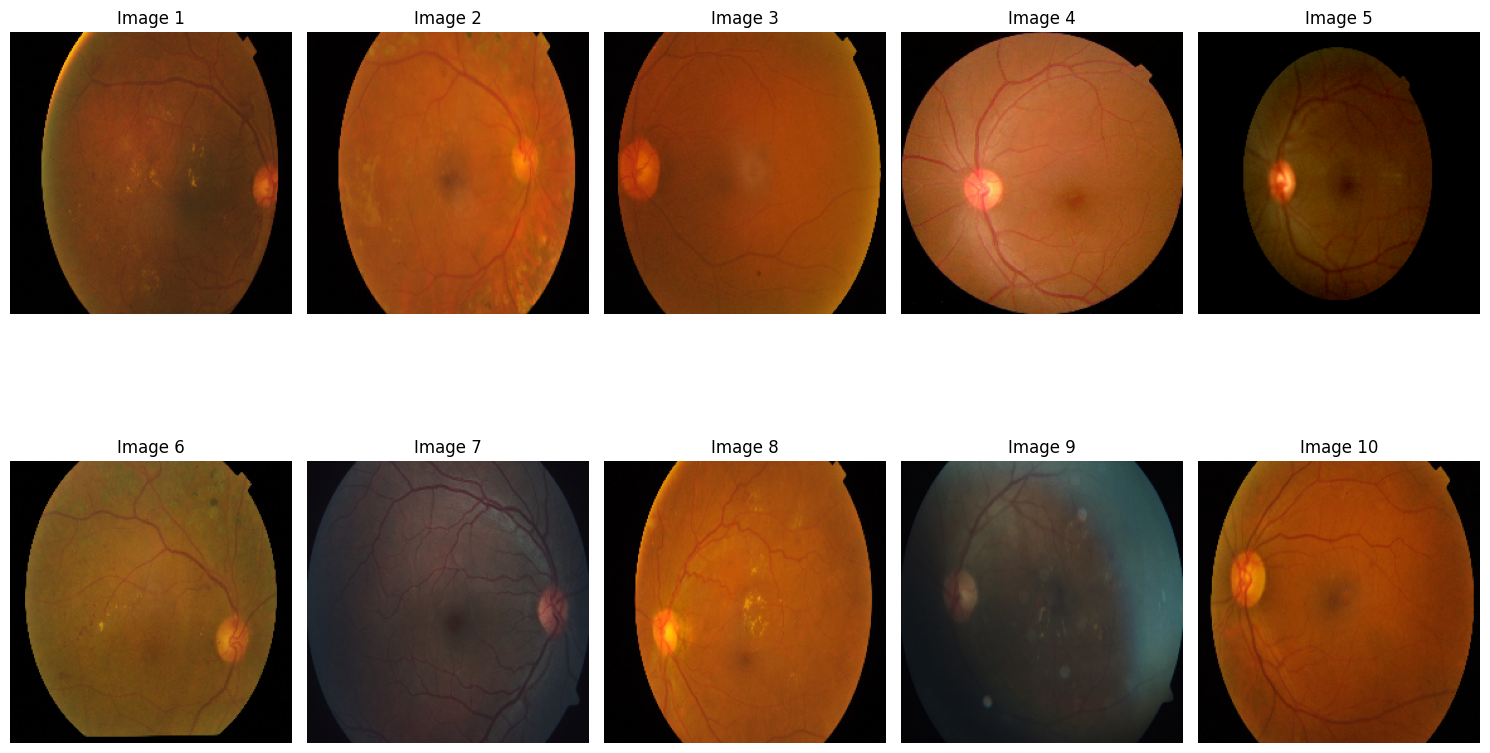

In [38]:
import cv2
import os
import matplotlib.pyplot as plt

# Path to resized images folder
resized_images_folder = r"D:\APTOS data\fyp_processed_dataset\images"

# Get the first 10 images
image_files = [f for f in os.listdir(resized_images_folder) if f.endswith('.png')][:10]

# Display the images
plt.figure(figsize=(15, 10))
for i, img_name in enumerate(image_files):
    img_path = os.path.join(resized_images_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
    
    plt.subplot(2, 5, i + 1)  # Create a 2x5 grid
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()
